In [9]:
library(rethinking)

In [10]:
data(foxes)

In [11]:
Fx <- foxes

In [42]:
summary(foxes$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.090   2.590   3.130   3.169   3.772   5.070 

In [44]:
#(1) 
area.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

area.seq<-seq(from=1,to=5,by=.5)

#Draw parameter samples from posterior. There's variance in mu.
mu <- link( weight.Model , data=data.frame(weight=area.seq) )
#Draw Prediction Simulations from psterior. There's variance in prediction/outcome.
sim.weight <- sim( weight.Model, data=data.frame(weight=area.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [45]:
HPDI(samples = sim.weight, prob = c(.5, .89, .97))

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
1.045849 1.545399 2.382952 2.529947 1.614476 1.097905

In [46]:
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [47]:
mean(Fx$weight)
mean(sim.weight)

[1] 4.529655

[1] 3.146664

In [48]:
weight.Model


Maximum a posteriori (MAP) model fit

Formula:
area ~ dnorm(mu, sigma)
mu <- a + b * weight
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
3.09997736 0.92416925 0.01526857 

Log-likelihood: -155.45 

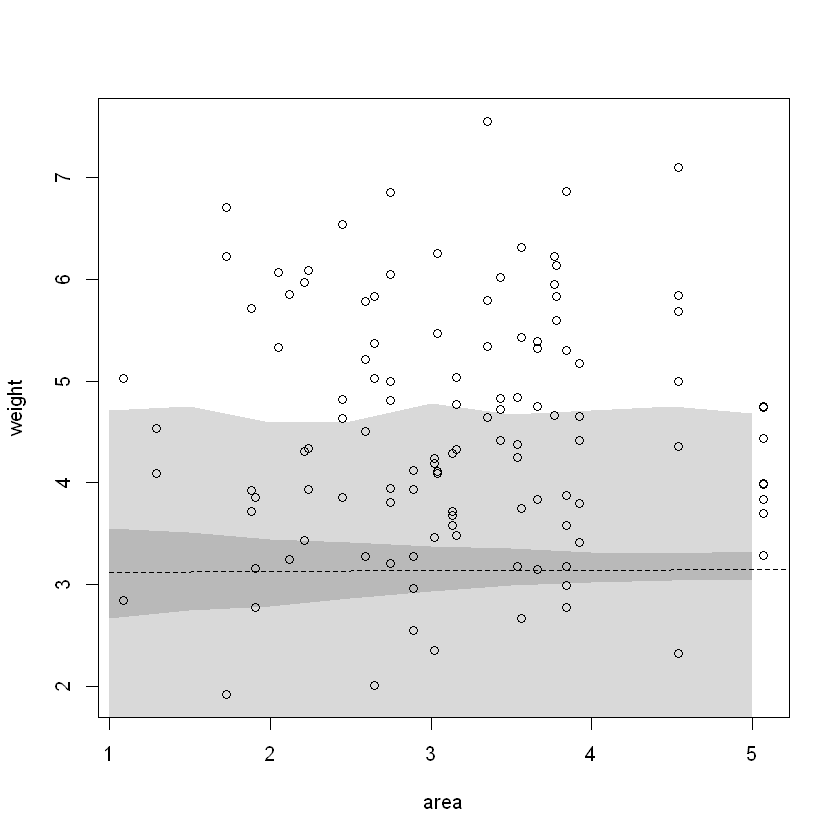

In [53]:
plot(weight~area, Fx)
lines(apply( mu , 2 , mean ), lty=2)
shade(apply( sim.weight , 2 , HPDI, prob = 0.9 ),area.seq)
shade(apply( mu , 2 , HPDI, prob = 0.9 ),area.seq)